In [1]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scipy.stats as stats


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
import lightgbm
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [4]:
#X_train and y_train prepare
data = pd.read_csv("train.csv")[:500]
X_train = data.drop(["id","target","f_27"],axis=1)
y_train = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42,  shuffle=True)

In [5]:
# models compare table
models = pd.DataFrame(columns=["model","parameters","model base score","prediction score"])

In [6]:
# 1 include, 0 exclude
Logistic_Regression = 1
KNeighbors_Classifier = 1
DecisionTree_Classifier = 1
Support_Vector_Machines_SVC = 1
AdaBoost_Classifier = 1
ExtraTree_Classifier = 1
SGD_Classifier = 1
Ridge_Classifier = 1
light_gbm = 1
XGB_Classifier = 1
QuadraticDiscriminant_Analysis = 1
RandomForest_Classifier = 1

In [7]:
# Logistic Regression
if Logistic_Regression == 1:

    # Simple
    model_simple = LogisticRegression(max_iter=2000).fit(X_train, y_train)
    predicts = model_simple.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['LogisticRegressionSimple', "Default", model_simple.score(X_train, y_train),predict_as]

    # Random Search
    cv_test= KFold(n_splits=5)
    parameters = {
                "C" : [0.0001, 0.001, 0.01, 0, 0.1, 1.0, 10, 100, 1000],
                "class_weight" : ["balanced", None],
                "solver" : ["newton-cg","lbfgs", "liblinear", "sag", "saga"],
                "fit_intercept" : [True, False],
                "dual" : [True, False],
                "multi_class" : ["auto", "ovr", "multinomial"],
                "l1_ratio" : [0.0, 0.001, 0.0001, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0],
                "warm_start" : [True, False],
                 }

    random_search = RandomizedSearchCV(LogisticRegression(max_iter = 2000), parameters, cv=cv_test, n_jobs=-1, random_state=42, verbose=True) 
    random_search.fit(X_train, y_train)
    predicts = random_search.best_estimator_.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['LogisticRegressionRS', random_search.best_params_, random_search.score(X_train, y_train),predict_as]

Logistic Regression ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [8]:
# KNeighbors Classifier
if KNeighbors_Classifier == 1:

    # Simple
    model_simple = KNeighborsClassifier().fit(X_train, y_train)
    predicts = model_simple.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['KNeighborsClassifierSimple', "Default", model_simple.score(X_train, y_train),predict_as]

    # Random Search
    cv_test= KFold(n_splits=5)
    parameters = {
                "weights" : ["uniform","distance"],
                "n_neighbors" : list(range(1,int(np.sqrt(len(y_train))),2)),
                "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]
                }

    random_search = RandomizedSearchCV(KNeighborsClassifier(), parameters, cv=cv_test, n_jobs=-1, random_state=42, verbose=True) 
    random_search.fit(X_train, y_train)
    predicts = random_search.best_estimator_.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['KNeighborsClassifierRS', random_search.best_params_, random_search.score(X_train, y_train),predict_as]

KNeighbors Classifier ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [9]:
# DecisionTreeClassifier
if DecisionTree_Classifier == 1:

    # Simple
    model_simple = DecisionTreeClassifier().fit(X_train, y_train)
    predicts = model_simple.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['DecisionTreeClassifierSimple', "Default", model_simple.score(X_train, y_train),predict_as]

    # Random Search
    cv_test= KFold(n_splits=5)
    parameters = {
                "criterion" : ["gini", "entropy", "log_loss"],
                "splitter" : ["best", "random"],
                "max_features" : ["auto", "sqrt", "log2", "None"],
                "max_depth": list(np.arange(1, 1000)),
                "min_samples_split" : list(np.arange(1, 100)),
                "ccp_alpha": [0.0, 0.001, 0.0001, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]
                }

    random_search = RandomizedSearchCV(DecisionTreeClassifier(), parameters, cv=cv_test, n_jobs=-1, random_state=42, verbose=True) 
    random_search.fit(X_train, y_train)
    predicts = random_search.best_estimator_.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['DecisionTreeClassifierRS', random_search.best_params_, random_search.score(X_train, y_train),predict_as]

DecisionTreeClassifier ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [10]:
# Support_Vector_Machines
if Support_Vector_Machines_SVC == 1:

    # Simple
    model_simple = SVC().fit(X_train, y_train)
    predicts = model_simple.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['SVCSimple', "Default", model_simple.score(X_train, y_train),predict_as]

    # Random Search
    cv_test= KFold(n_splits=5)
    parameters = {
                "shrinking" : [True, False],
                "gamma" : ["scale", "auto"],
                'C': [0.0001, 0.001, 0.01, 0, 0.1, 1.0, 10, 100, 1000],
                "cache_size" : [2000],
                "decision_function_shape" : ["ovo","ovr"]
                }

    random_search = RandomizedSearchCV(SVC(), parameters, cv=cv_test, n_jobs=-1, random_state=42, verbose=True) 
    random_search.fit(X_train, y_train)
    predicts = random_search.best_estimator_.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['SVCRS', random_search.best_params_, random_search.score(X_train, y_train),predict_as]

SVC ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [11]:
# AdaBoostClassifier
if AdaBoost_Classifier == 1:

    # Simple
    model_simple = AdaBoostClassifier().fit(X_train, y_train)
    predicts = model_simple.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['AdaBoostClassifierSimple', "Default", model_simple.score(X_train, y_train),predict_as]

    # Random Search
    cv_test= KFold(n_splits=5)
    parameters = {
                "algorithm" : ["SAMME","SAMME.R"],
                "learning_rate" : [0.0, 0.001, 0.0001, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0],
                "n_estimators" : list(np.arange(1, 1000, 10))
                }

    random_search = RandomizedSearchCV(AdaBoostClassifier(), parameters, cv=cv_test, n_jobs=-1, random_state=42, verbose=True) 
    random_search.fit(X_train, y_train)
    predicts = random_search.best_estimator_.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['AdaBoostClassifierRS', random_search.best_params_, random_search.score(X_train, y_train),predict_as]

AdaBoostClassifier ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [12]:
# ExtraTree Classifier
if ExtraTree_Classifier == 1:

    # Simple
    model_simple = ExtraTreeClassifier().fit(X_train, y_train)
    predicts = model_simple.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['ExtraTreeClassifierSimple', "Default", model_simple.score(X_train, y_train),predict_as]

    # Random Search
    cv_test= KFold(n_splits=5)
    parameters = {
                "criterion" :["gini", "entropy", "log_loss"],
                "splitter" : ["random", "best"],
                "max_features" : ["auto", "sqrt", "log2"],
                "max_depth" : list(np.arange(1, 50, 1)),
                "min_samples_split" : list(np.arange(1, 50, 1)),
                "min_samples_leaf" :  list(np.arange(1, 50, 1)),
                }

    random_search = RandomizedSearchCV(ExtraTreeClassifier(), parameters, cv=cv_test, n_jobs=-1, random_state=42, verbose=True)
    random_search.fit(X_train, y_train)
    predicts = random_search.best_estimator_.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['ExtraTreeClassifierRs', random_search.best_params_, random_search.score(X_train, y_train),predict_as]

ExtraTree Classifier ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [13]:
# SGDClassifier
if SGD_Classifier == 1:

    # Simple
    model_simple = SGDClassifier().fit(X_train, y_train)
    predicts = model_simple.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['SGDClassifierSimple', "Default", model_simple.score(X_train, y_train),predict_as]

    # Random Search
    cv_test= KFold(n_splits=5)
    parameters = {
                "alpha": [0.0, 0.001, 0.0001, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0],
                "penalty" : ["l2", "l1", "elasticnet"],
                "l1_ratio" : stats.uniform(0, 1),
                "fit_intercept" : [True, False],
                "shuffle" : [True, False],
                }

    random_search = RandomizedSearchCV(SGDClassifier(), parameters, cv=cv_test, n_jobs=-1, random_state=42, verbose=True)
    random_search.fit(X_train, y_train)
    predicts = random_search.best_estimator_.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['SGDClassifierRS', random_search.best_params_, random_search.score(X_train, y_train),predict_as]

SGDClassifier ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [14]:
# RidgeClassifier
if Ridge_Classifier == 1:

    # Simple
    model_simple = RidgeClassifier().fit(X_train, y_train)
    predicts = model_simple.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['RidgeClassifierSimple', "Default", model_simple.score(X_train, y_train),predict_as]

    # Random Search
    cv_test= KFold(n_splits=5)
    parameters = {
                "alpha": [0.0, 0.001, 0.0001, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0],
                "fit_intercept" : [True, False],
                "copy_X":[False,True],
                "solver" : ["auto","svd","cholesky","lsqr","sparse_cg","sag","saga","lbfgs"],
                "positive" : [True, False]
                }

    random_search = RandomizedSearchCV(RidgeClassifier(), parameters, cv=cv_test, n_jobs=-1, random_state=42, verbose=True) 
    random_search.fit(X_train, y_train)
    predicts = random_search.best_estimator_.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['RidgeClassifierRS', random_search.best_params_, random_search.score(X_train, y_train),predict_as]

RidgeClassifier ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [15]:
# lightgbm
if light_gbm == 1:

    # Simple
    model_simple = lightgbm.LGBMClassifier().fit(X_train, y_train)
    predicts = model_simple.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['lightgbmSimple', "Default", model_simple.score(X_train, y_train),predict_as]

    # Random Search
    cv_test= KFold(n_splits=5)
    parameters = {
                "learning_rate" : [0.0, 0.001, 0.0001, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0],
                "n_estimators" : list(np.arange(1, 300, 1)),
                "num_leaves": [6,8,12,16]
                }

    random_search = RandomizedSearchCV(lightgbm.LGBMClassifier(), parameters, cv=cv_test, n_jobs=-1, random_state=42, verbose=True) 
    random_search.fit(X_train, y_train)
    predicts = random_search.best_estimator_.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['lightgbmRS', random_search.best_params_, random_search.score(X_train, y_train),predict_as]

lightgbm ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [16]:
# XGBClassifier
if XGB_Classifier == 1:

    # Simple
    model_simple = XGBClassifier().fit(X_train, y_train)
    predicts = model_simple.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['XGBClassifierSimple', "Default", model_simple.score(X_train, y_train),predict_as]

    # Random Search
    cv_test= KFold(n_splits=5)
    parameters = {
            'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
            'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
            'max_depth': [5,6,7,8,9,10,11,12,13,14],
            'n_estimators': [50,65,80,100,115,130,150],
            'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
            'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

    random_search = RandomizedSearchCV(XGBClassifier(), parameters, cv=cv_test, n_jobs=-1, random_state=42, verbose=True) 
    random_search.fit(X_train, y_train)
    predicts = random_search.best_estimator_.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['XGBClassifierRS', random_search.best_params_, random_search.score(X_train, y_train),predict_as]

XGBClassifier ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [17]:
# QuadraticDiscriminantAnalysis
if QuadraticDiscriminant_Analysis == 1:

    # Simple
    model_simple = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
    predicts = model_simple.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['QuadraticDiscriminantAnalysisSimple', "Default", model_simple.score(X_train, y_train),predict_as]

    # Random Search
    cv_test= KFold(n_splits=5)
    parameters = {
                "reg_param" : [0.0, 0.001, 0.0001, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]
            }

    random_search = RandomizedSearchCV(QuadraticDiscriminantAnalysis(), parameters, cv=cv_test, n_jobs=-1, random_state=42, verbose=True) 
    random_search.fit(X_train, y_train)
    predicts = random_search.best_estimator_.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['QuadraticDiscriminantAnalysisRS', random_search.best_params_, random_search.score(X_train, y_train),predict_as]

QuadraticDiscriminantAnalysis ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [18]:
# RandomForest_Classifier
if RandomForest_Classifier == 1:

    # Simple
    model_simple = RandomForestClassifier().fit(X_train, y_train)
    predicts = model_simple.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['RandomForestClassifierSimple', "Default", model_simple.score(X_train, y_train),predict_as]

    # Random Search
    cv_test= KFold(n_splits=5)
    parameters = {
                "n_estimators" : list(np.arange(1, 500, 1)),
                "criterion" : ["gini","entropy","log_loss"],
                "max_depth" : list(np.arange(1, 50, 1)),
                "max_features" : ["sqrt","log2","None"]
            }

    random_search = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=cv_test, n_jobs=-1, random_state=42, verbose=True) 
    random_search.fit(X_train, y_train)
    predicts = random_search.best_estimator_.predict(X_test)
    predict_as = accuracy_score(y_test, predicts)
    models.loc[len(models)+1] = ['RandomForestClassifierRS', random_search.best_params_, random_search.score(X_train, y_train),predict_as]

RandomForest_Classifier ...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [21]:
models.sort_values("prediction score",ascending=False)

,model,parameters,model base score,prediction score
22,QuadraticDiscriminantAnalysisRS,{'reg_param': 0.0},0.913433,0.666667
21,QuadraticDiscriminantAnalysisSimple,Default,0.913433,0.666667
23,RandomForestClassifierSimple,Default,1.000000,0.624242
17,lightgbmSimple,Default,1.000000,0.606061
19,XGBClassifierSimple,Default,1.000000,0.600000
24,RandomForestClassifierRS,"{'n_estimators': 120, 'max_features': 'sqrt', ...",1.000000,0.587879
18,lightgbmRS,"{'num_leaves': 6, 'n_estimators': 131, 'learni...",1.000000,0.575758
16,RidgeClassifierRS,"{'solver': 'lbfgs', 'positive': True, 'fit_int...",0.516418,0.569697
13,SGDClassifierSimple,Default,0.602985,0.557576
9,AdaBoostClassifierSimple,Default,0.892537,0.557576


In [ ]:
sns.set(rc={'figure.figsize':(70,10)})

Fig Saved


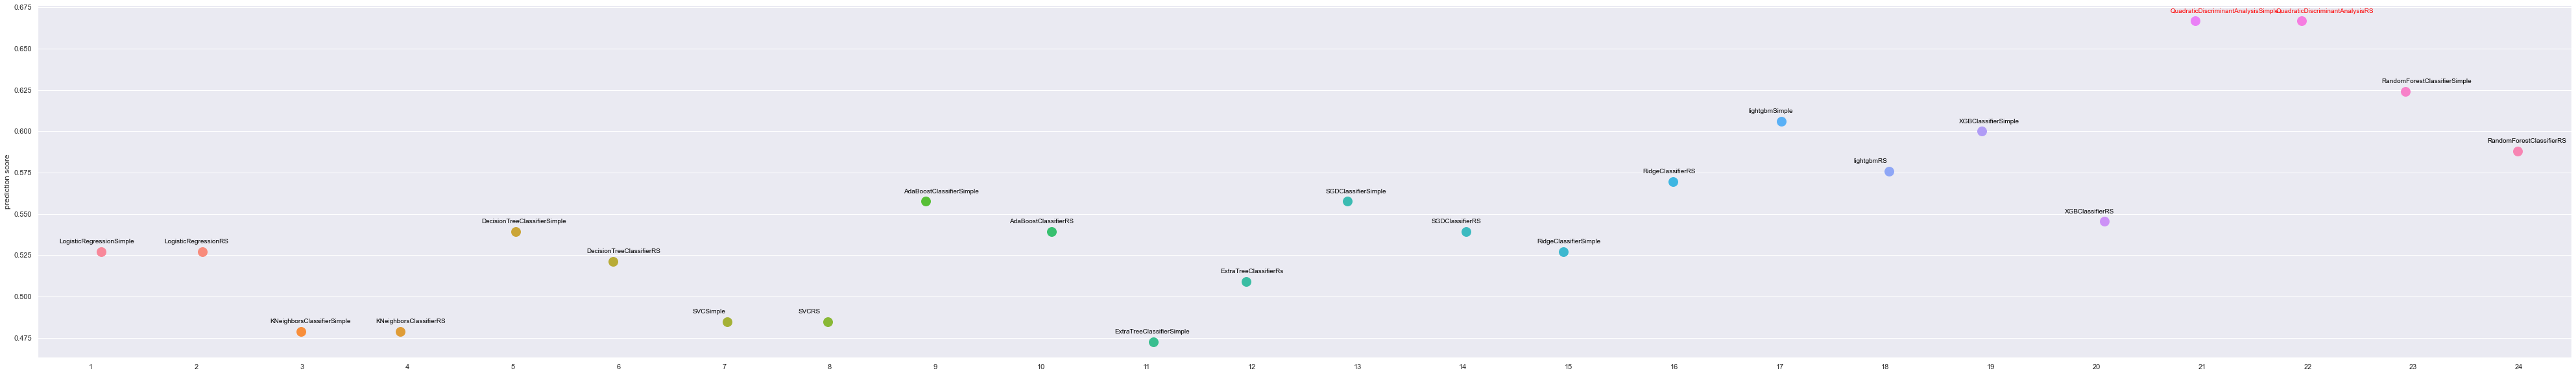

In [23]:
ax = sns.stripplot(x = models.index, y="prediction score",data=models, size=15)
index = 0
for i in models.values:
    model_name = i[0]
    model_score = i[3]
    if model_score == models["prediction score"].max():
        text_color = "red"
    else:
        text_color = "black"
    plt.text(index-0.3, model_score+0.005, model_name, horizontalalignment='left', size='small',color=text_color)
    index +=1
fig = ax.get_figure()
fig.savefig("out.png") 
print("Fig Saved")